In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.collections import PathCollection
%matplotlib inline
from IPython.display import HTML
import pandas.util.testing as tm

#Dataset

In [ ]:
df=pd.read_csv("/content/drive/My Drive/dataset/master.csv")
df.head()

country  year  ... gdp_per_capita ($)       generation
0  Albania  1987  ...                796     Generation X
1  Albania  1987  ...                796           Silent
2  Albania  1987  ...                796     Generation X
3  Albania  1987  ...                796  G.I. Generation
4  Albania  1987  ...                796          Boomers

[5 rows x 12 columns]

In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].str.replace(',','',regex=True)
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype(int)

# Statistical Analysis 

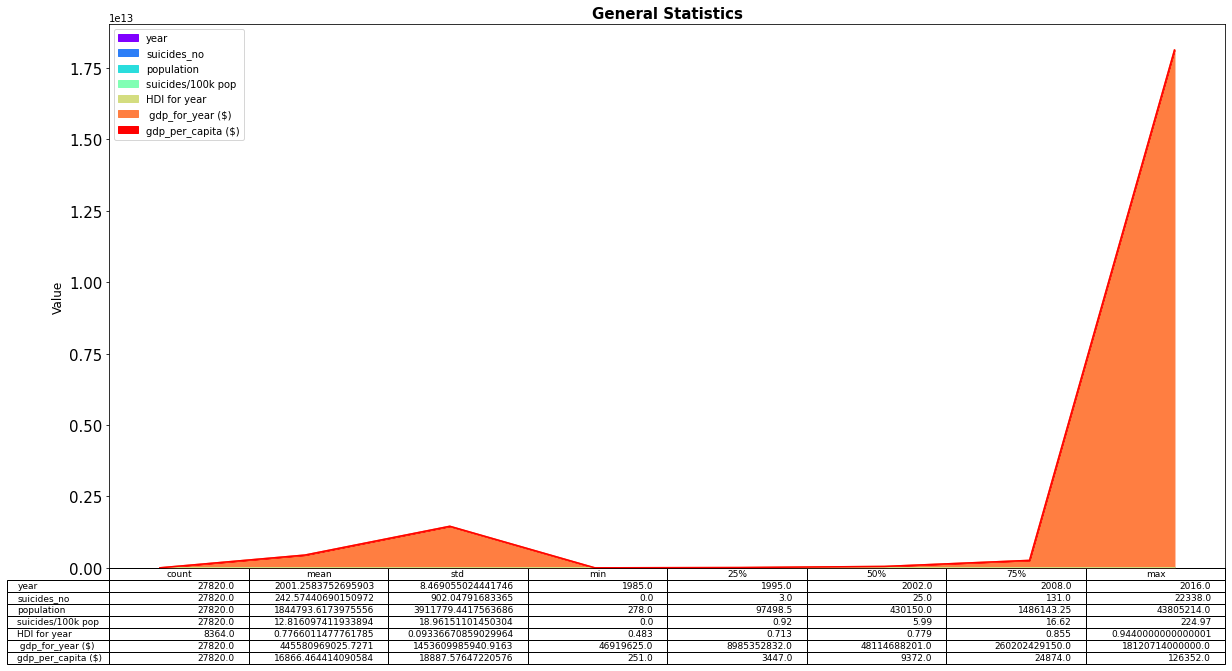

In [ ]:
frame1=df.describe().plot(kind = "area",fontsize=15, figsize = (20,10), table =True,colormap="rainbow",stacked=True)
plt.ylabel('Value',fontsize=12)
plt.title("General Statistics",fontweight='bold',fontsize=15)
frame1.axes.get_xaxis().set_visible(False)
plt.show()

#Inference:
 1. The table along the X-axis gives various statistical information about the columns in the dataset.

   1.1.  It can be inferred that of all the maximum values, GDP per year holds the highest.

   1.2. The plot takes a dip from min to 50 percentile indicating that the     values of the integer columns such as suicide no., population, suicides per 100k population,HDI for year and GDP per capita in those regions are comparatively very small  to that of GDP per year.

#Lineplot: Suicide Pattern differentiated by Gender

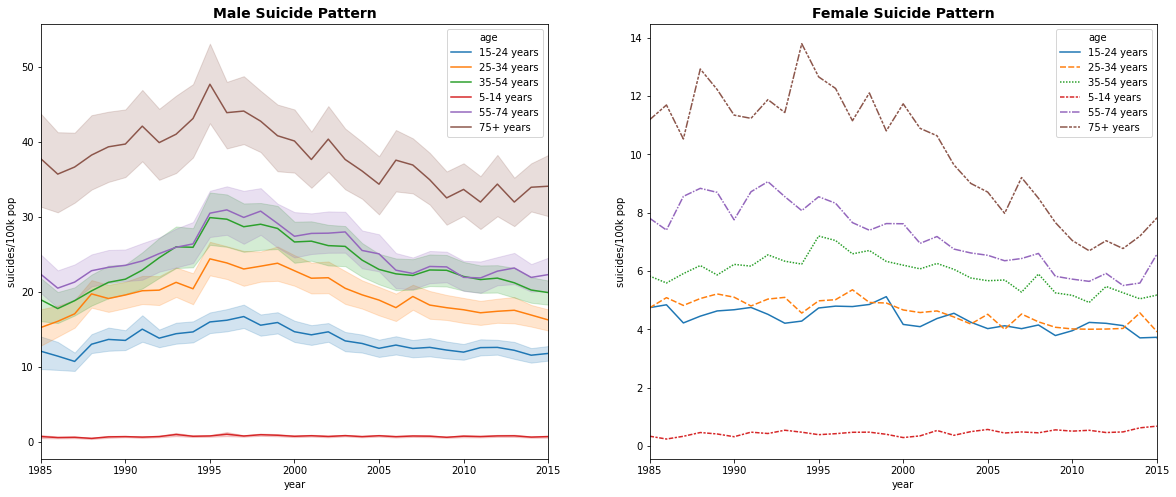

In [ ]:
fig = plt.figure(figsize=(20,8))
df_sort =  df.sort_values(by='age')
fig.add_subplot(121)
plt.title('Male Suicide Pattern',fontweight='bold', fontsize=14)
plt.xlim(1985,2015) 
sns.lineplot(data=df_sort[df_sort['sex'] == 'male'], x='year',y='suicides/100k pop',hue='age',ci=70)
fig.add_subplot(122)
plt.title('Female Suicide Pattern',fontweight='bold', fontsize=14)
plt.xlim(1985,2015)  
sns.lineplot(data=df_sort[df_sort['sex'] == 'female'], x='year',y='suicides/100k pop',hue='age',style='age',ci=None)
plt.show()

#Inference:
1. Both Female and male suicides at the age of around 5-14 years is relatively flat and stays around 0-2 suicides/100k population.

2. In the year 1995,almost 50 suicides per 100k population happened(the highest)for males aged above 75 years.

3. For males whose age is 25-34 years old, the minimum no. of suicides/100k pop. is between the range of 10-20 while the maximum range is around 20-30.
4.The no. of suicides/100k pop. reduced for females above 75 over the years. In 1986, the range was 10-12 while it decreased to 8-10 in the year 2015.

#LinePlot: No. of suicides over the years between 1986-2016

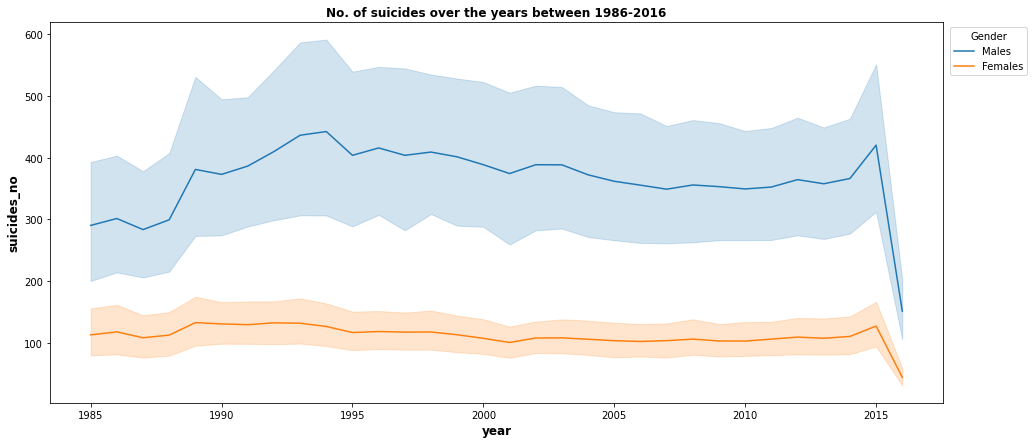

In [ ]:
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]
plt.figure(figsize=(16,7))
plt.title("No. of suicides over the years between 1986-2016",fontweight='bold',fontsize=12)
lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
plt.xlabel('year',fontweight='bold',fontsize=12)
plt.ylabel('suicides_no',fontweight='bold',fontsize=12)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'],title='Gender',bbox_to_anchor=(1.1,1))
plt.show()

#Inference:
1. It is understood that males took their lives more than the females over the years.

2. Near the year 2015, more than 400 males suicided.
3. From 2000-2013, the suicide rate for females remains visibly stable.

#Subplots comparing the columns based on Country

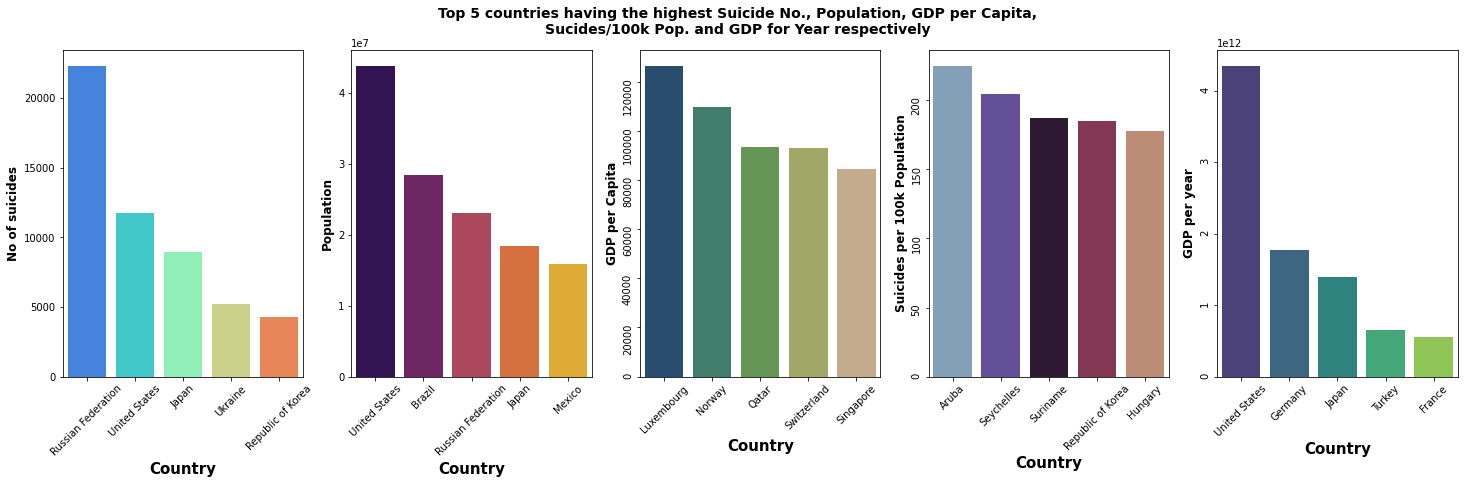

In [ ]:

plt.figure(figsize=(25,6))
plt.subplot(1,5,1)
top1=df.groupby('country')['suicides_no'].max().to_frame().reset_index()
top1=top1.nlargest(5,'suicides_no')
sns.barplot(x=top1.country,y=top1.suicides_no,palette='rainbow')
plt.xticks(rotation=45)
plt.ylabel("No of suicides" ,fontweight='bold',fontsize=12)
plt.xlabel("Country",fontweight='bold',fontsize=15)
plt.suptitle('Top 5 countries having the highest Suicide No., Population, GDP per Capita,\nSucides/100k Pop. and GDP for Year respectively',fontweight='bold', fontsize=14)


plt.subplot(1,5,2)
top4=df.groupby('country')['population'].max().to_frame().reset_index()
top4=top4.nlargest(5,'population')
sns.barplot(x='country',y='population',data=top4,palette='inferno')
plt.xticks(rotation=45)
plt.ylabel("Population" ,fontweight='bold',fontsize=12)
plt.xlabel("Country",fontweight='bold',fontsize=15)

plt.subplot(1,5,3)
top3=df.groupby('country')['gdp_per_capita ($)'].max().to_frame().reset_index()
top3=top3.nlargest(5,'gdp_per_capita ($)')
sns.barplot(x='country',y='gdp_per_capita ($)',data=top3,palette='gist_earth')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.ylabel("GDP per Capita" ,fontweight='bold',fontsize=12)
plt.xlabel("Country",fontweight='bold',fontsize=15)

plt.subplot(1,5,4)
top2=df.groupby('country')['suicides/100k pop'].max().to_frame().reset_index()
top2=top2.nlargest(5,'suicides/100k pop')
sns.barplot(x='country',y='suicides/100k pop',data=top2,palette='twilight')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.ylabel("Suicides per 100k Population" ,fontweight='bold',fontsize=12)
plt.xlabel("Country",fontweight='bold',fontsize=15)

plt.subplot(1,5,5)
top5=df.groupby('country')[' gdp_for_year ($) '].min().to_frame().reset_index()
top5=top5.nlargest(5,' gdp_for_year ($) ','first' )
sns.barplot(x='country',y=' gdp_for_year ($) ',data=top5,palette='viridis')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.ylabel("GDP per year" ,fontweight='bold',fontsize=12)
plt.xlabel("Country",fontweight='bold',fontsize=15)

plt.show()




#Inference:
1. Russian Federation has the highest no. of suicides.
2.United States of America has the highest population.
3.Luxemberg's GDP per Capita is the highest and reaches around 120000.
4.Aruba has the highest suicides per 100k population.
5.USA has the highest GDP for year around $1.75x10^13 .


#No. of suicides Vs. Year differed by Generation

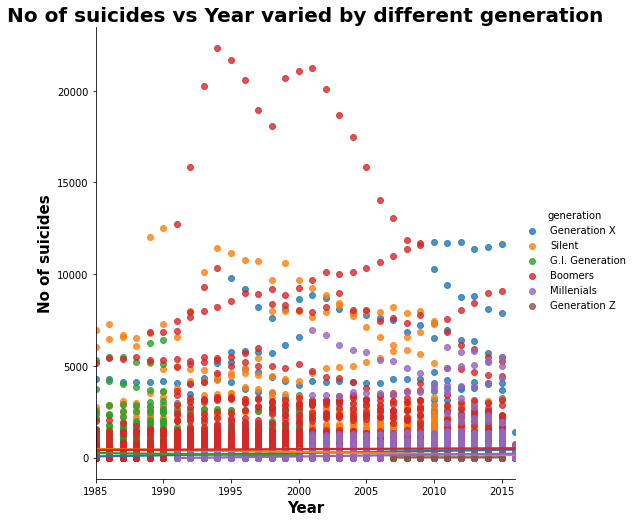

In [ ]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation", truncate=True, height=7, data=df)
g.set_axis_labels("Year", "Suicides No")                                                       
plt.title('No of suicides vs Year varied by different generation' ,fontweight='bold',fontsize=20)
plt.ylabel("No of suicides" ,fontweight='bold',fontsize=15)
plt.xlabel("Year",fontweight='bold',fontsize=15)
plt.show()

#Inference:
1. The generation of Boomers have the highest no. of suicides.
2. Relatively, the no. of suicides of Generation Z is very less when compared to other generations.
3.Silent Generation comes second after Boomers in terms of no. of suicides.
4.G.I generation (1901-1927) suicides decreased after the years of 2000.

#BOX PLOT: 

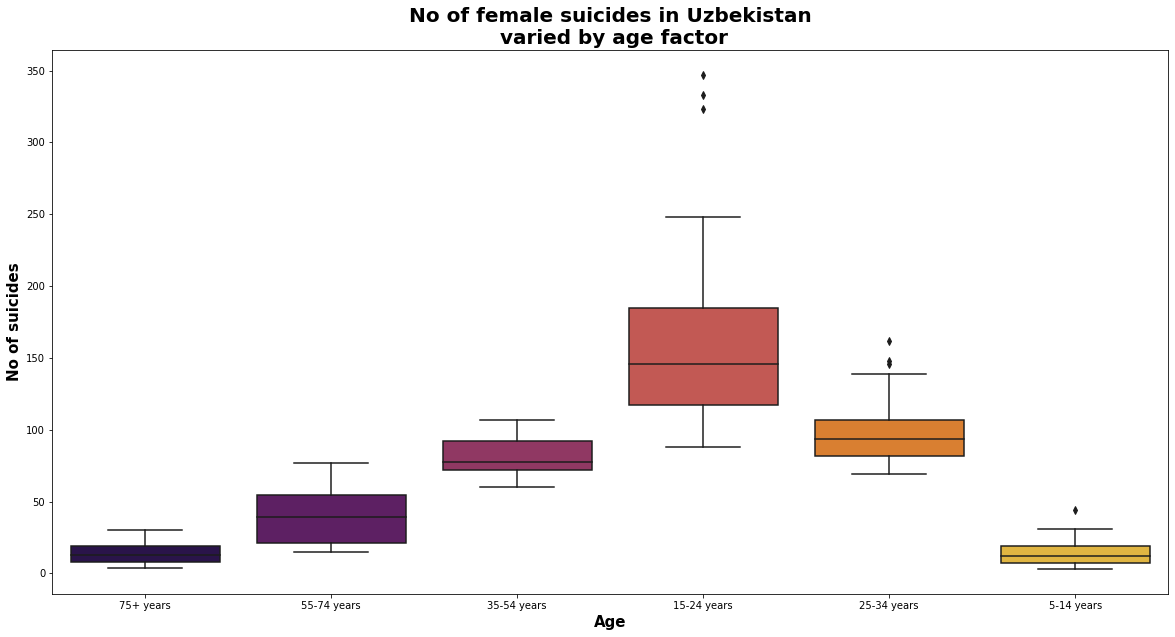

In [ ]:
plt.figure(figsize=(20,10))
df1=df.loc[((df['sex']=='female')&(df['country']=='Uzbekistan')),['year','age','suicides_no']]
sns.boxplot(data=df1,x='age',y='suicides_no',palette='inferno')
plt.title('No of female suicides in Uzbekistan\n varied by age factor',fontweight='bold',fontsize=20)
plt.ylabel("No of suicides" ,fontweight='bold',fontsize=15)
plt.xlabel("Age",fontweight='bold',fontsize=15)
plt.show()

#Inference:
1. Age 15-24 old females in Uzbekistan  has the maximum no. of suicides.
2. The median of age=55-74 years old females in Uzbekistan  is quite near to 50 suicides.
3. The 75th quartile of 35-54 year old females in Uzbekistan  is about 90.
4. The outlier for 5-14 year old females in Uzbekistan lies around 50 suicides.

(Note on Outliers:
 If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum.)

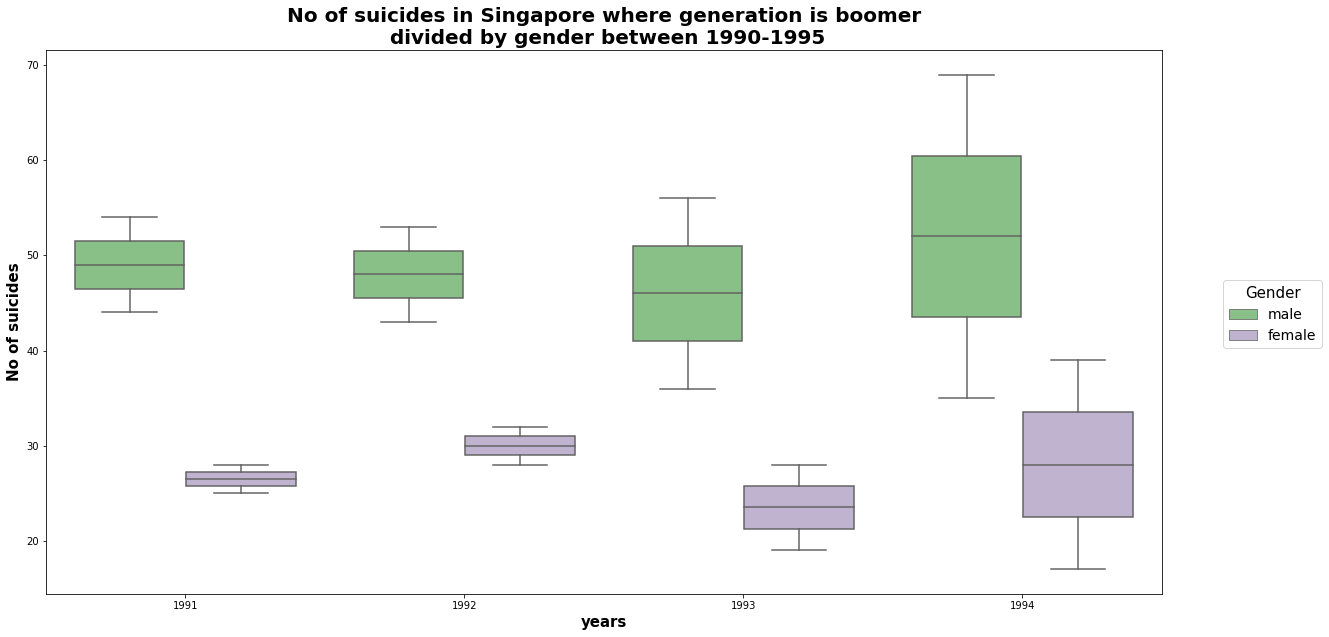

In [ ]:
plt.figure(figsize=(20,10))
df2=df.loc[((df['generation']=='Boomers')&(df['country']=='Singapore')&(df['year']>1990)&(df['year']<1995)),['country','year','suicides_no','sex','age']]
sns.boxplot(data=df2,y='suicides_no',x='year',palette='Accent',hue='sex')
plt.title('No of suicides in Singapore where generation is boomer\n divided by gender between 1990-1995',fontweight='bold',fontsize=20)
plt.ylabel("No of suicides" ,fontweight='bold',fontsize=15)
plt.xlabel("years",fontweight='bold',fontsize=15)
plt.legend(title='Gender',bbox_to_anchor=(1.15, 0.59),fontsize=14,title_fontsize=15)
plt.show()

#Inference:
1. In year 1994, the median of no. of male suicides of boomer generation in Singapore lie around 50.
2. In 1994, female suicided maxed around 40.
3. The 25th percentile is around 20 suicides belonging to boomer females in Singapore.
4. The minimum no. of suicides for males boomer in Singapore lies around 40.


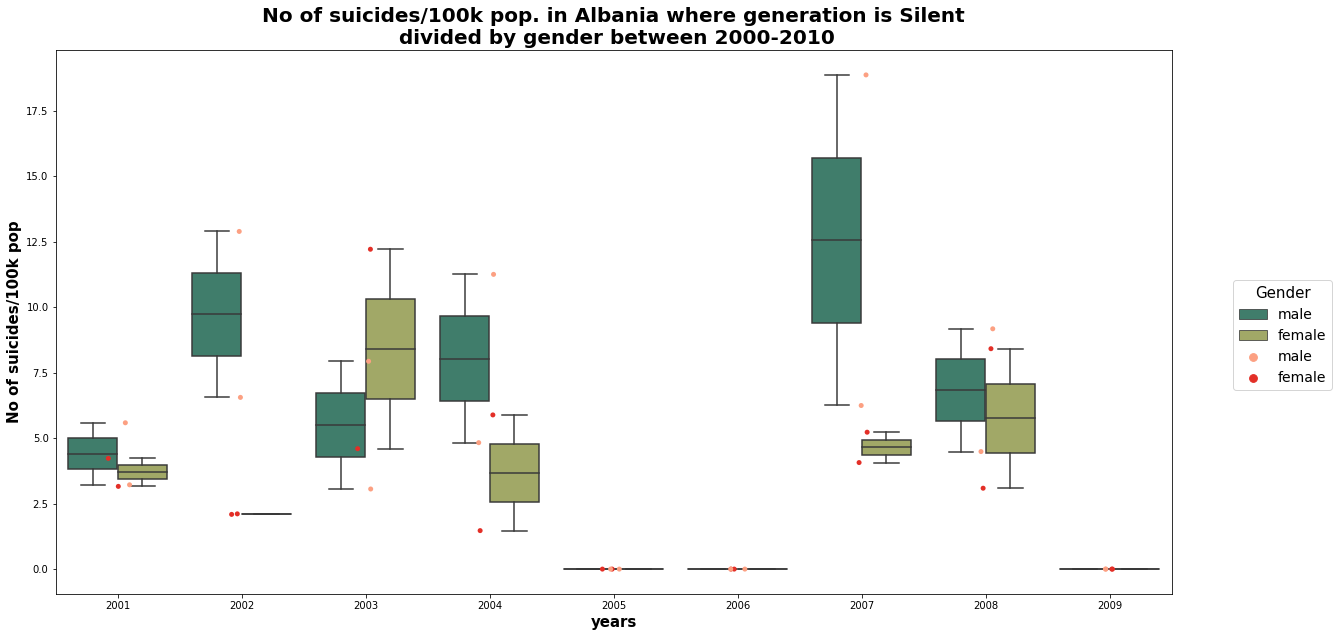

In [ ]:
plt.figure(figsize=(20,10))
df2=df.loc[((df['generation']=='Silent')&(df['country']=='Albania')&(df['year']>2000)&(df['year']<2010)),['country','year','suicides/100k pop','sex','age']]
sns.boxplot(data=df2,y='suicides/100k pop',x='year',palette='gist_earth',hue='sex')
sns.stripplot(data=df2,y='suicides/100k pop',x='year',palette='Reds',hue='sex')
plt.title('No of suicides/100k pop. in Albania where generation is Silent\n divided by gender between 2000-2010',fontweight='bold',fontsize=20)
plt.ylabel("No of suicides/100k pop" ,fontweight='bold',fontsize=15)
plt.xlabel("years",fontweight='bold',fontsize=15)
plt.legend(title='Gender',bbox_to_anchor=(1.15, 0.59),fontsize=14,title_fontsize=15)
plt.show()

#Inference:
1. In 2005, 2006 and 2009, No Suicides/100k pop. happened between 2000-10 among the Silent generation.
2. The highest no. of male suicides/100k pop. during this period  happened in 2007.
3. In 2002, the female no of suicides/100k pop. is about 2.3-2.4 which is the lowest among this period, for females.

#Pair plot

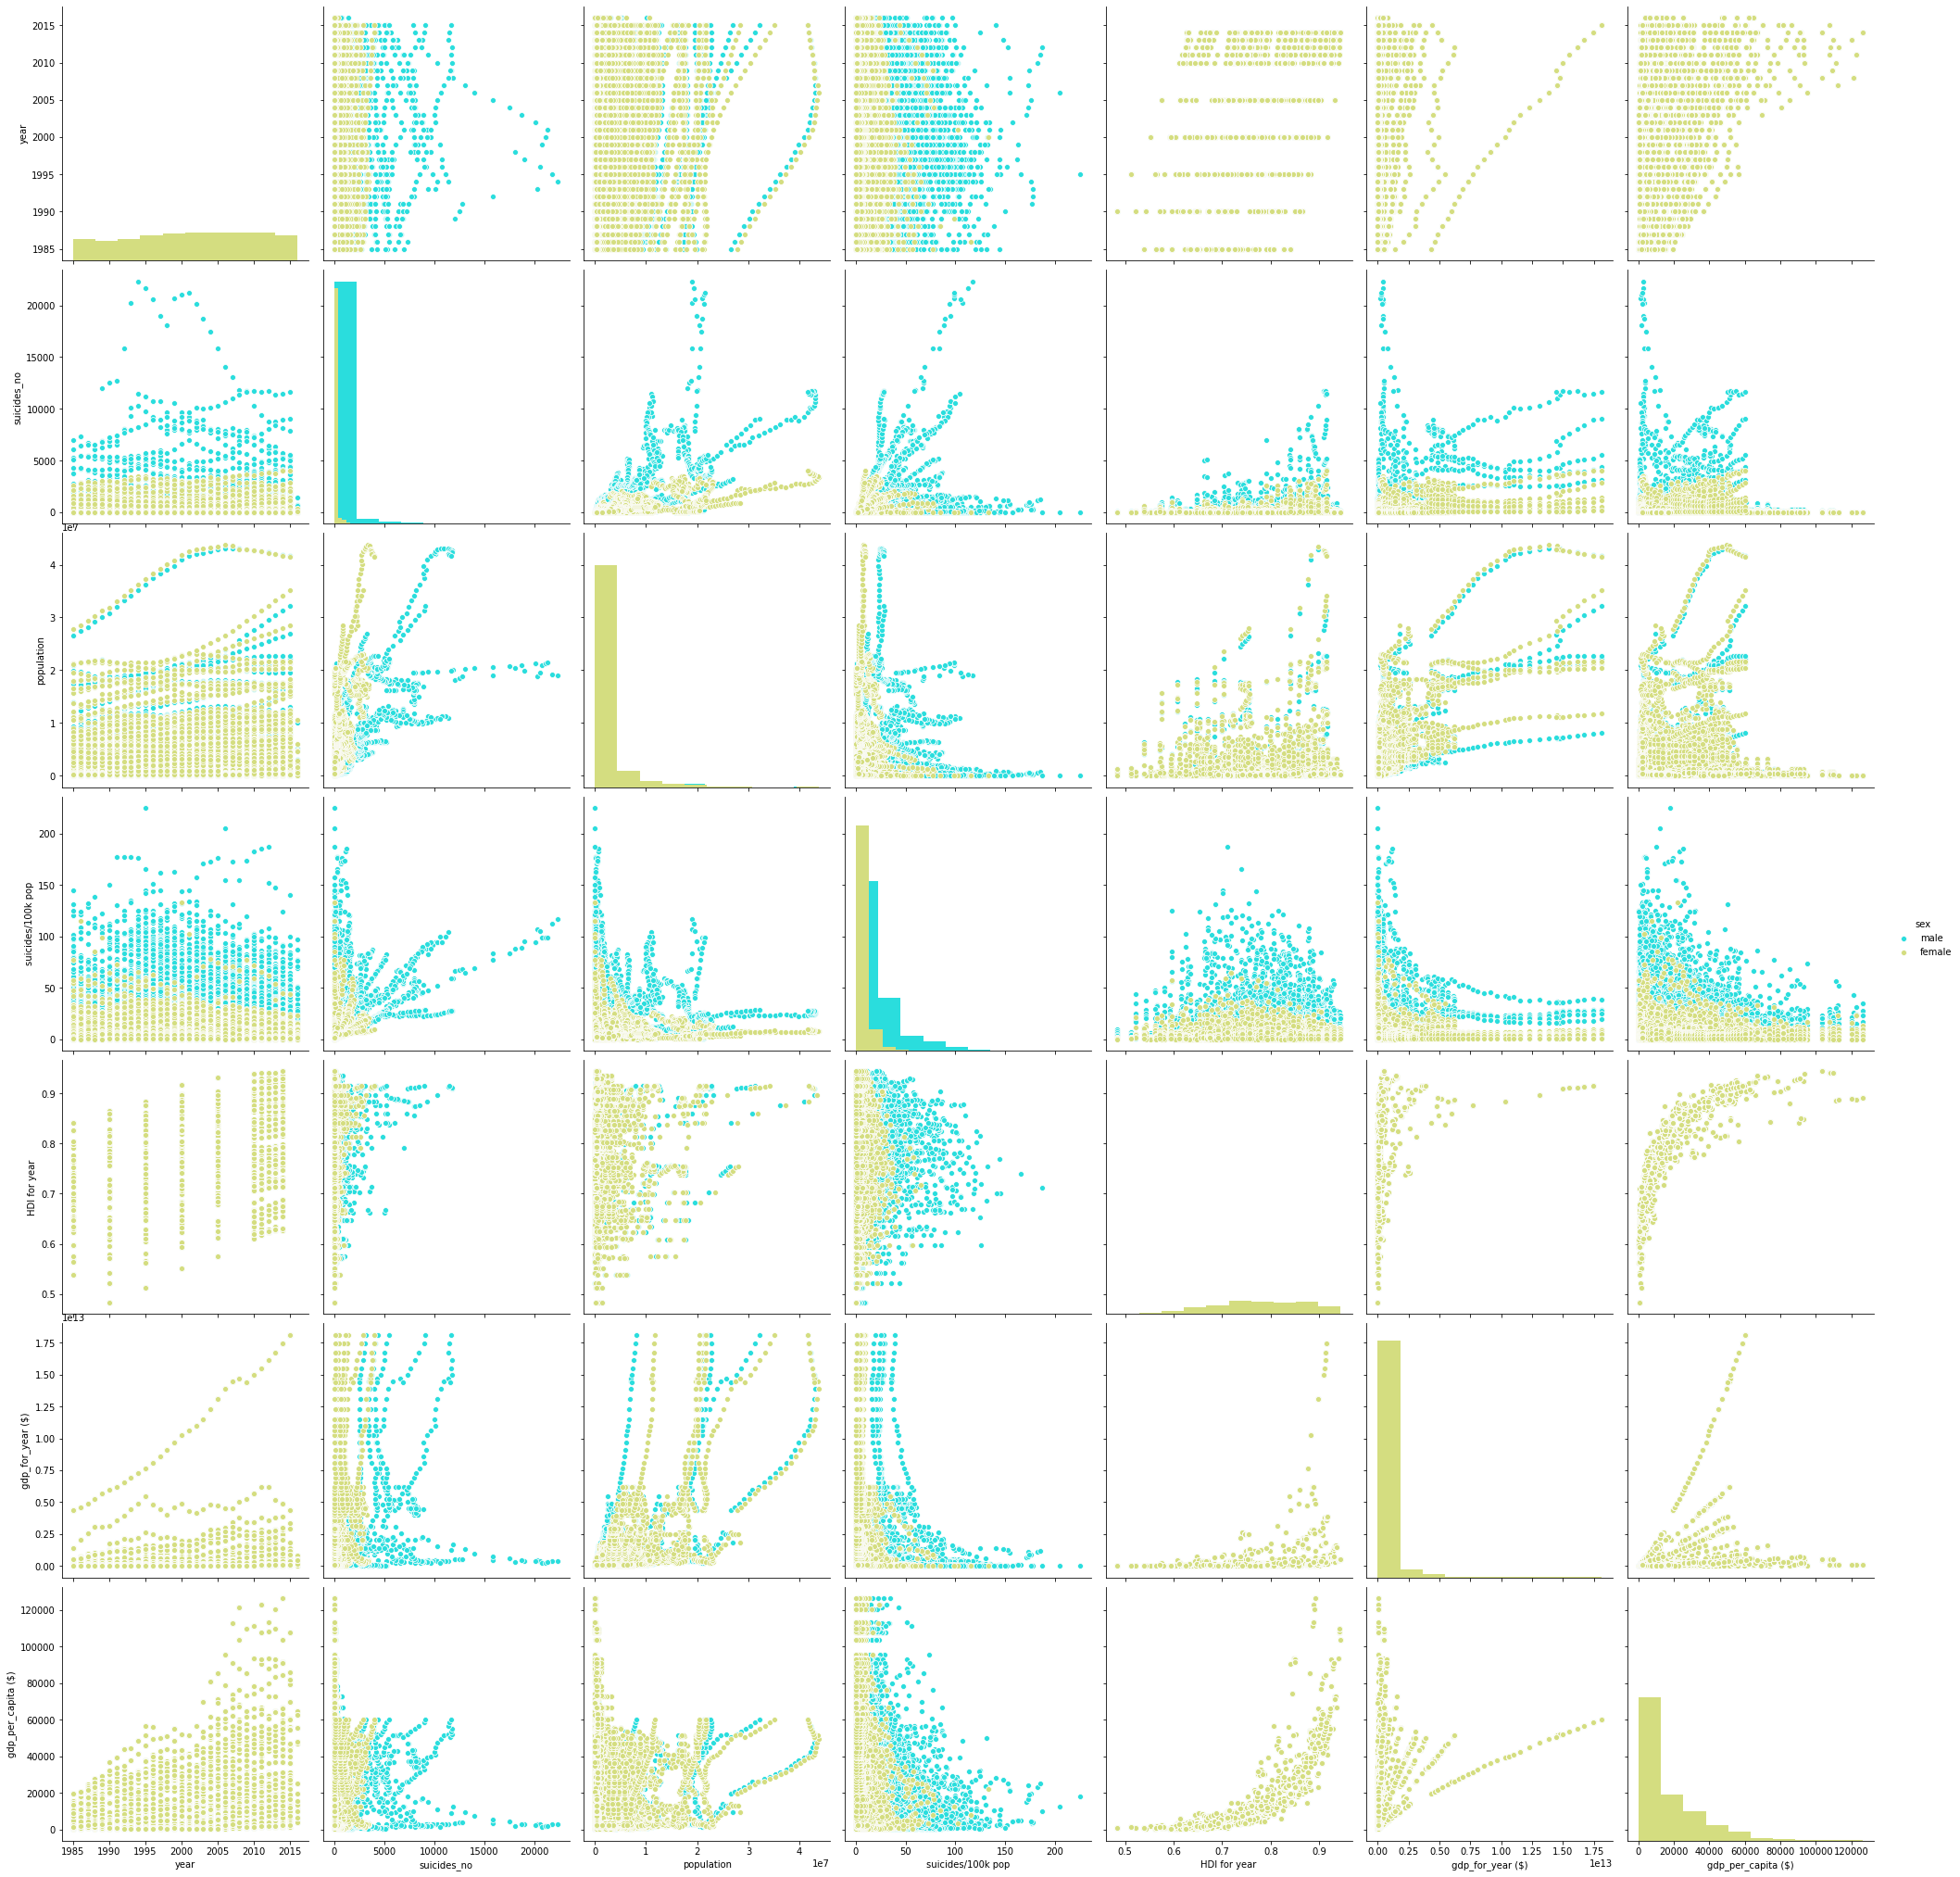

In [ ]:
sns.pairplot(df,hue='sex',palette='rainbow',height=4,diag_kind="hist",dropna=True);

#Inference:

Plot pairwise relationships in a dataset is displayed.
1. GDP for year increases steadily over the years.
2. No. of suicides per 100k pop. decreases with increase in GDP for year.
3. The human life expectancy index increases with increase in GDP per Capita.
4. The GDP for year increases with the GDP per Capita.

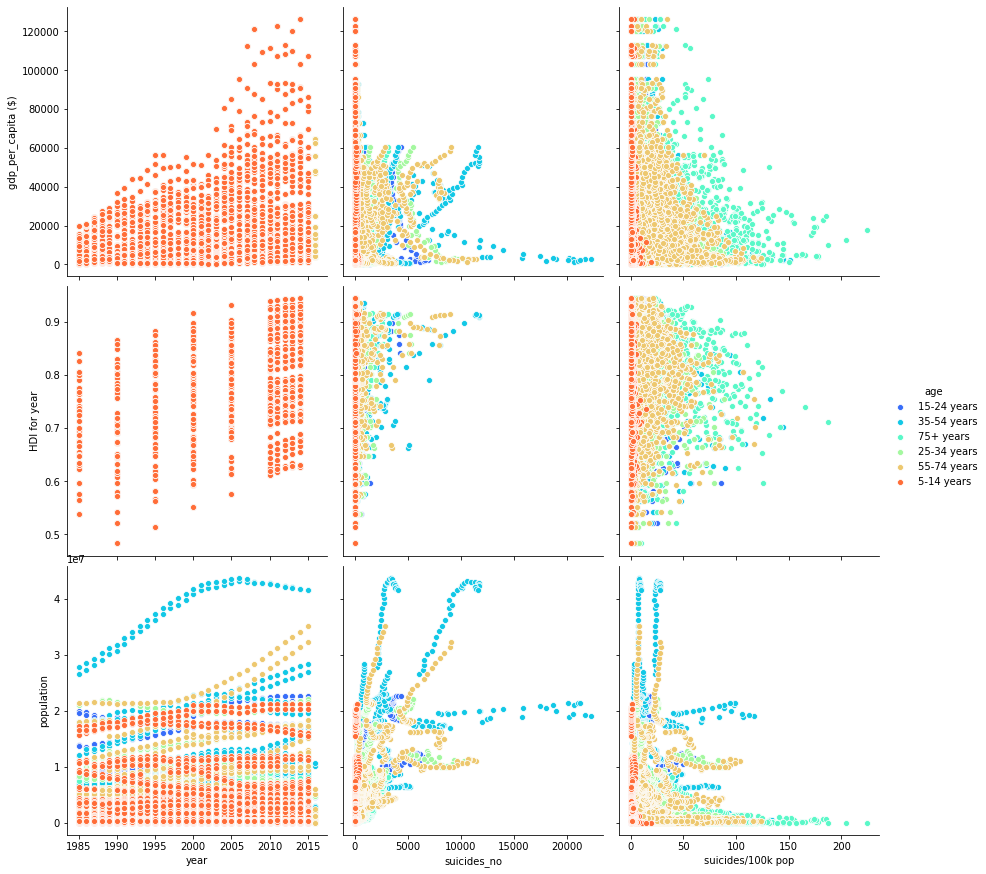

In [ ]:
a=sns.pairplot(df,hue='age',x_vars=['year','suicides_no','suicides/100k pop'],y_vars=['gdp_per_capita ($)','HDI for year','population'],palette='rainbow',height=4);

#Inference:
1. Population of people over the age of 35-54 increases over the years between 1986-2016.
2. The humam life expectancy increases for the age 5-14 when the number of suicides is minimum.
3.The GDP per capita procured for 75+ aged population, decreases as the no. of suicides/100k increases.
4. Around 20000k children populated the world stabely over the years of 1986-2016.

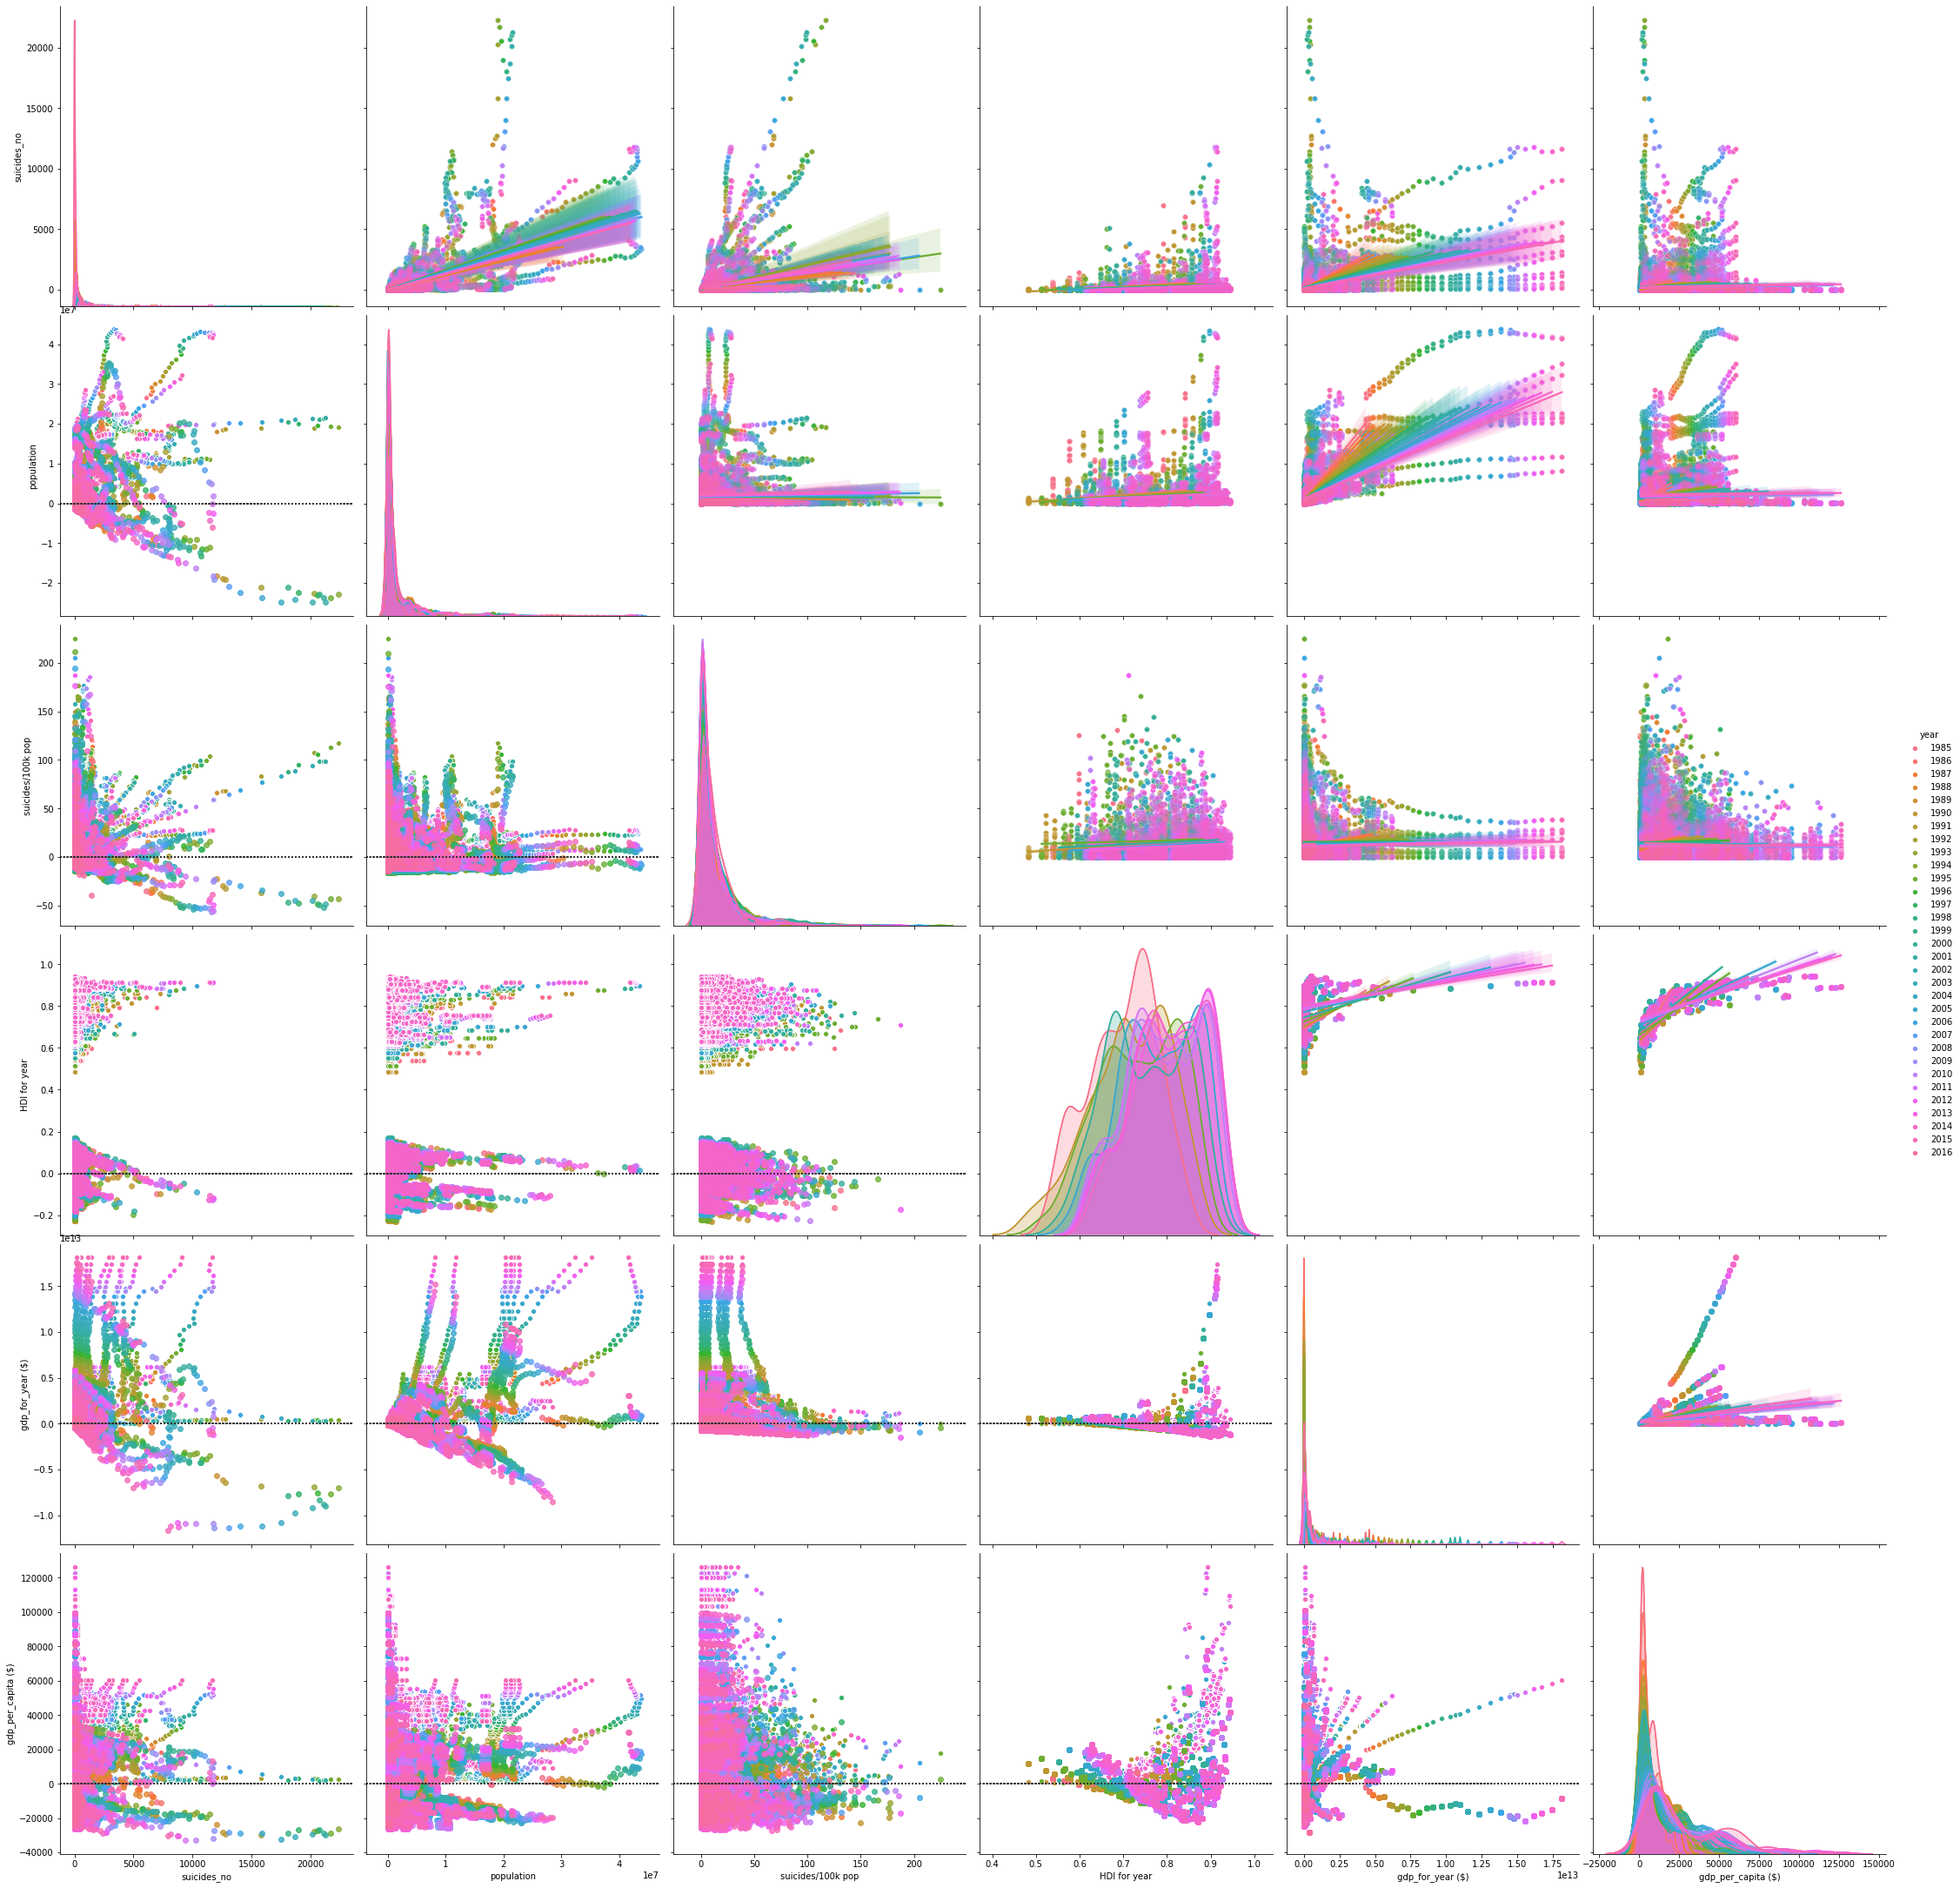

In [ ]:
g = sns.pairplot(df, hue="year",height=5,dropna=True)
g.map_diag(sns.kdeplot)
g.map_upper(sns.regplot, truncate=True, scatter_kws=dict(alpha=0.2))
g.map_lower(sns.residplot);

#Inference:
1. The GDP per Capita dropped to negative when the no. of suicides reached its highest. Since Russia has the highest no. of suicides. Its well established that Russia's GDP drooped down tremendously among the years of 1990s.
2. 2011 and above years saw an increse in GDP per Capita as the no. of suicides/100k remained stable in the range of 0-70.
3.In 2000s, HD Index is increased along with the GDP per Capita.

#Heat Map

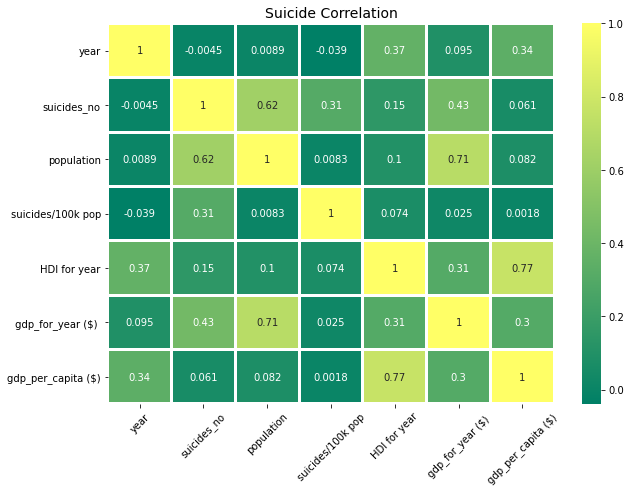

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(df.corr(),cmap='summer',annot=True,linewidth=2)
plt.xticks(rotation=45)
plt.show()

#Inference:
As noted in the plots, age/generation and sex are significant factors in determining suicide rates.

1. The negative correation indicates that as the years go by, there seems a subtle decrease in the no. of suicides.
2. The value 0.77 states that life expectancy increases with GDP per Capita at the level 0.77.
3. The value 0.0083 states that there is no visible change in relation seen between Population and suicides per 100k.

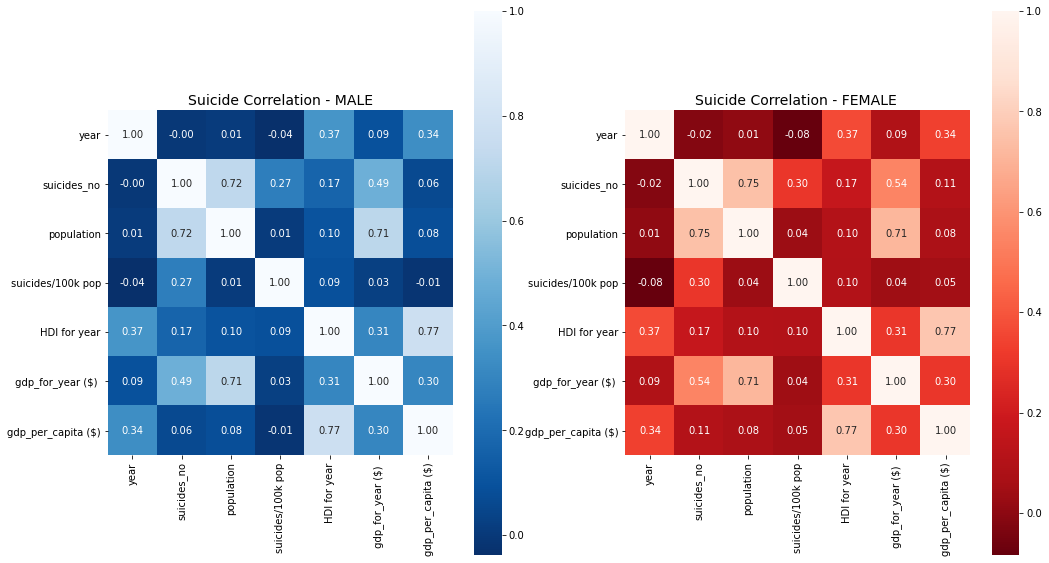

In [ ]:
m=df.loc[df['sex']=='male'].corr()
f=df.loc[df['sex']=='female'].corr()

fig = plt.figure(figsize=(17,10))
fig.add_subplot(121)
plt.title('Suicide Correlation - MALE', fontsize=14)
sns.heatmap(m, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
fig.add_subplot(122)
plt.title('Suicide Correlation - FEMALE ', fontsize=14)
sns.heatmap(f, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')
plt.show()

#Inference:

Age/generation are significant factors for both males and females in determining suicide rates.

1. There is 0.31 value change of relation for females stating that there is a subtle increase in GDP per year as the life expectancy increases.
2. A subtle population increase as the years goes by for both male and female.
3. GDP per year increases with GDP per Capita.

#CAT PLOT

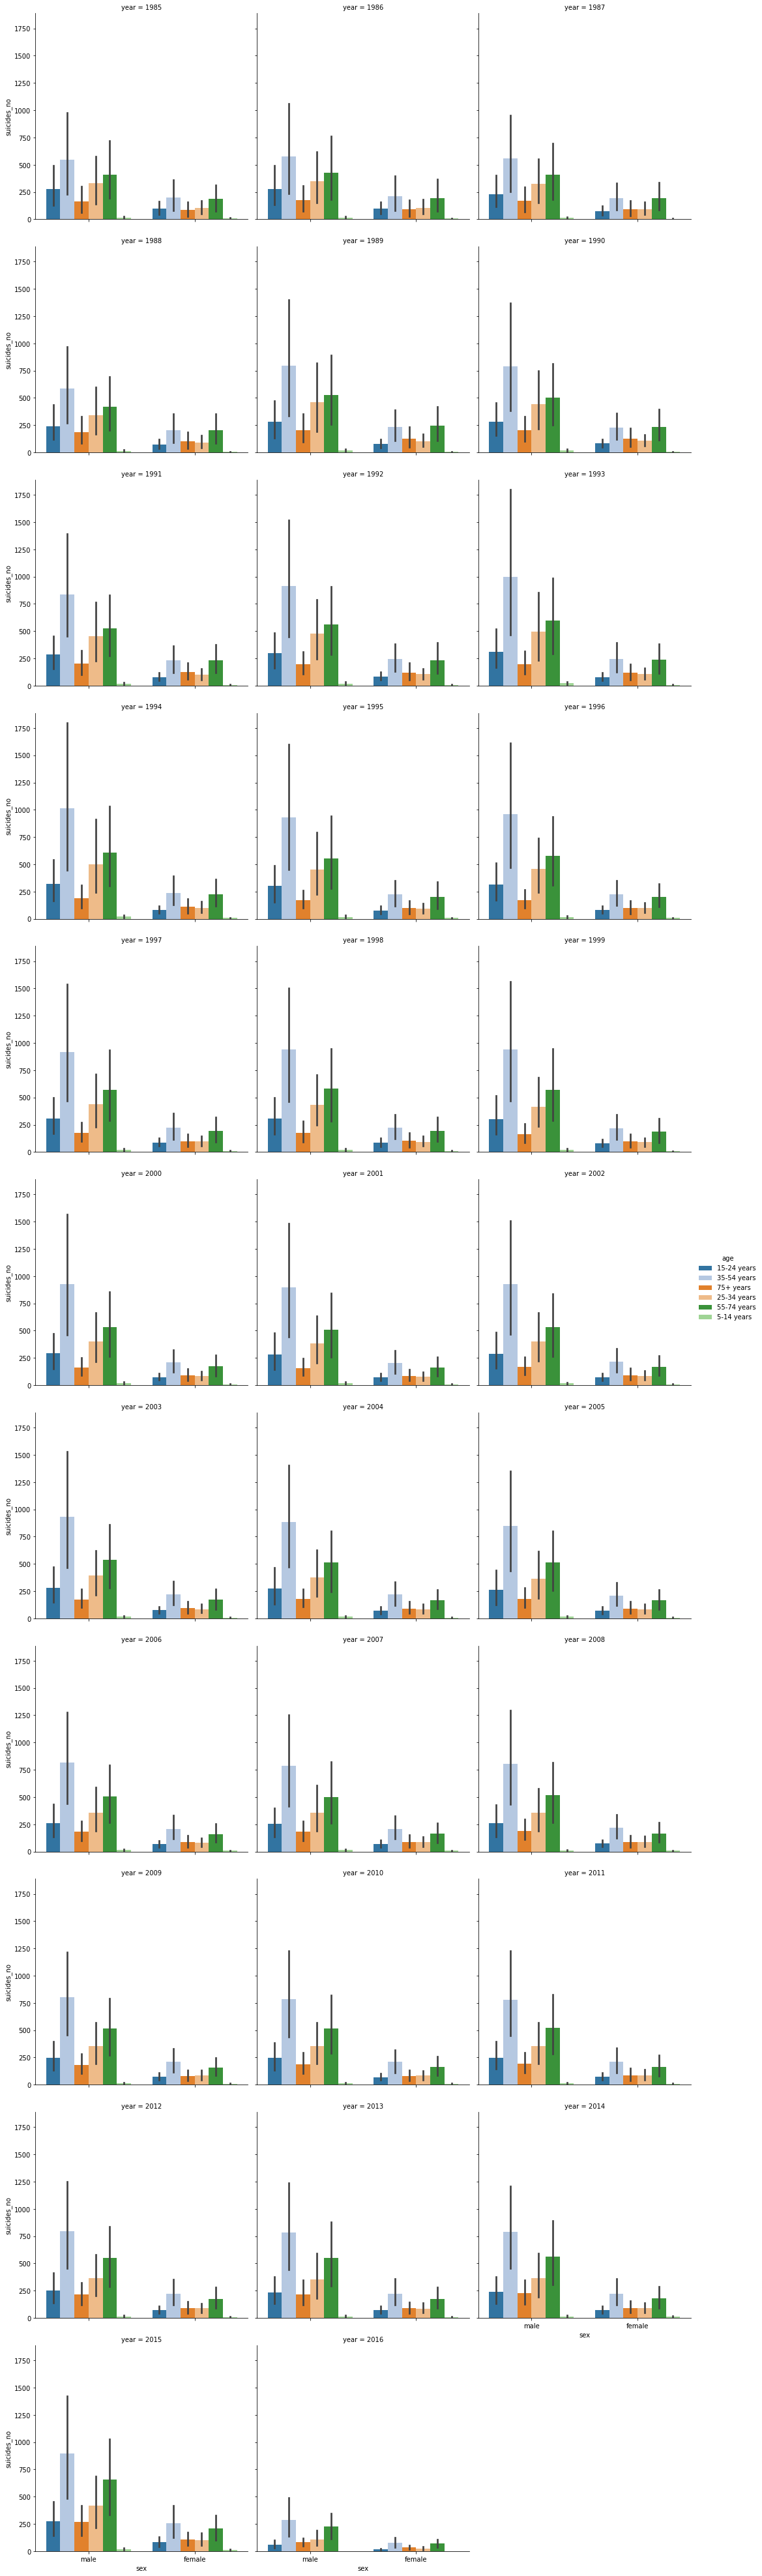

In [ ]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=df,palette='tab20',kind='bar',col_wrap=3)

#Inference:
1. In the year 2016, the no. of suicides is comparatively low for both the gender.
2.In the years of 1994-2005, Males aged around 35-54 years has about 900-1000 no. of suicides.
3. Aged 55-74, males have no. of suicides around 200-500 in the yars of 1986-89.
4. In 2016, female suicide number hit the all time low over all the ages.

#Joint plot

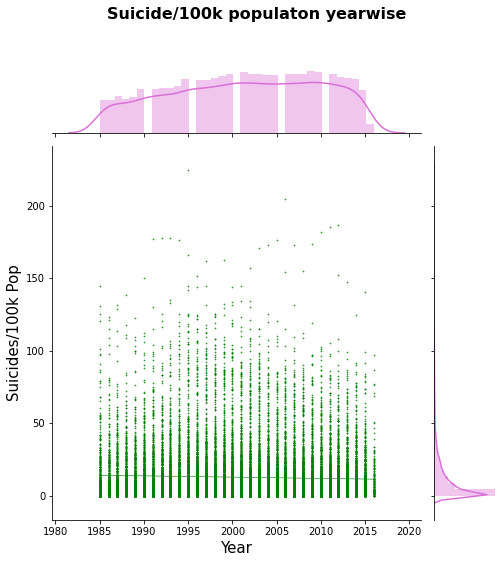

In [ ]:
sns.jointplot(y='suicides/100k pop',x='year',data=df,kind='reg',color='green',scatter_kws={'s': 2, 'linewidth': 0.2},joint_kws={'line_kws': {'linewidth': 0.5}},
                  marginal_kws={'color': 'orchid'},height=7)
plt.suptitle('Suicide/100k populaton yearwise',fontweight='bold',position=(0.5,1.1),fontsize=16)
plt.ylabel("Suicides/100k Pop" ,fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

#Inference:
      The distribution of the year is shown in the top and the distribution of
       suicides per 100k pop. is shown at the side visualized as histograms. 
       The distribution of suicides per 100k is higher in the range of 0-50 
       while the year is distributed averagely even. There is not much suicides 
       per 100k in the range of 150-200.

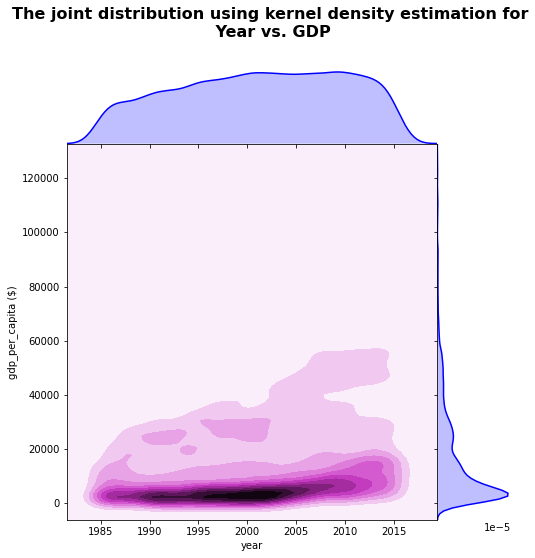

In [ ]:
sns.jointplot(data=df,x='year',y='gdp_per_capita ($)', kind="kde", height=7,color='orchid', space=0, marginal_kws={'color': 'blue'})
plt.suptitle('The joint distribution using kernel density estimation for\n Year vs. GDP',position=(0.5,1.1),fontweight='bold',fontsize=16)
plt.show()

#Inference:
     The GDP per Capita is distributed normally over 0-10000.
     The kde density shows the continuous probability density curve for year
      against GDP per Capita. The concentrated color indicates the low GDP per
       Capita over the year 1990-2005.

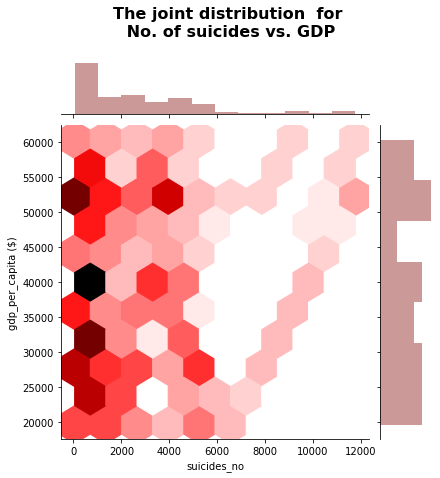

In [ ]:
sns.jointplot(y='gdp_per_capita ($)',x='suicides_no',kind='hex',data=df[df['country']=='United States'],height=6,color='maroon')
plt.suptitle('The joint distribution  for\n No. of suicides vs. GDP',position=(0.5,1.1),fontweight='bold',fontsize=16)
plt.show()

#Inference:
     The darker shades of red indicates thar when the no. of suicides are
      minimum ,GDP per Capita is high. The distribution on the top depicts the
      same. The histogram on the leftside indicates the the no.of suicides is 
      constant for 20k-30k GDP per Capita.

#violin plot

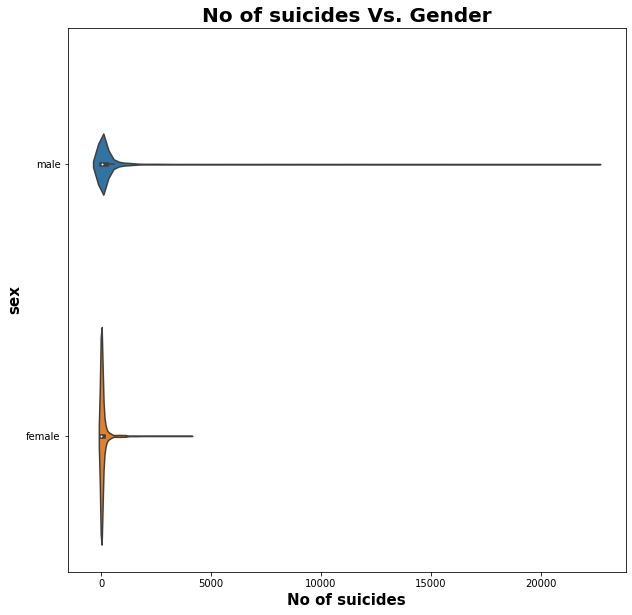

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x="suicides_no", y="sex",data=df)
plt.title('No of suicides Vs. Gender',fontweight='bold',fontsize=20)
plt.xlabel("No of suicides" ,fontweight='bold',fontsize=15)
plt.ylabel("sex",fontweight='bold',fontsize=15)
plt.show()

#Inference:
1. The no. of suicides for females is lesser than 5000.
2. The slim but bulging violin indicates that the probabilty to find suicides between the range in more.
3. The outlier in the male category indicated that the probability of finding suicides for male has some anomalies apart from the calculations and ranges upto 20000.

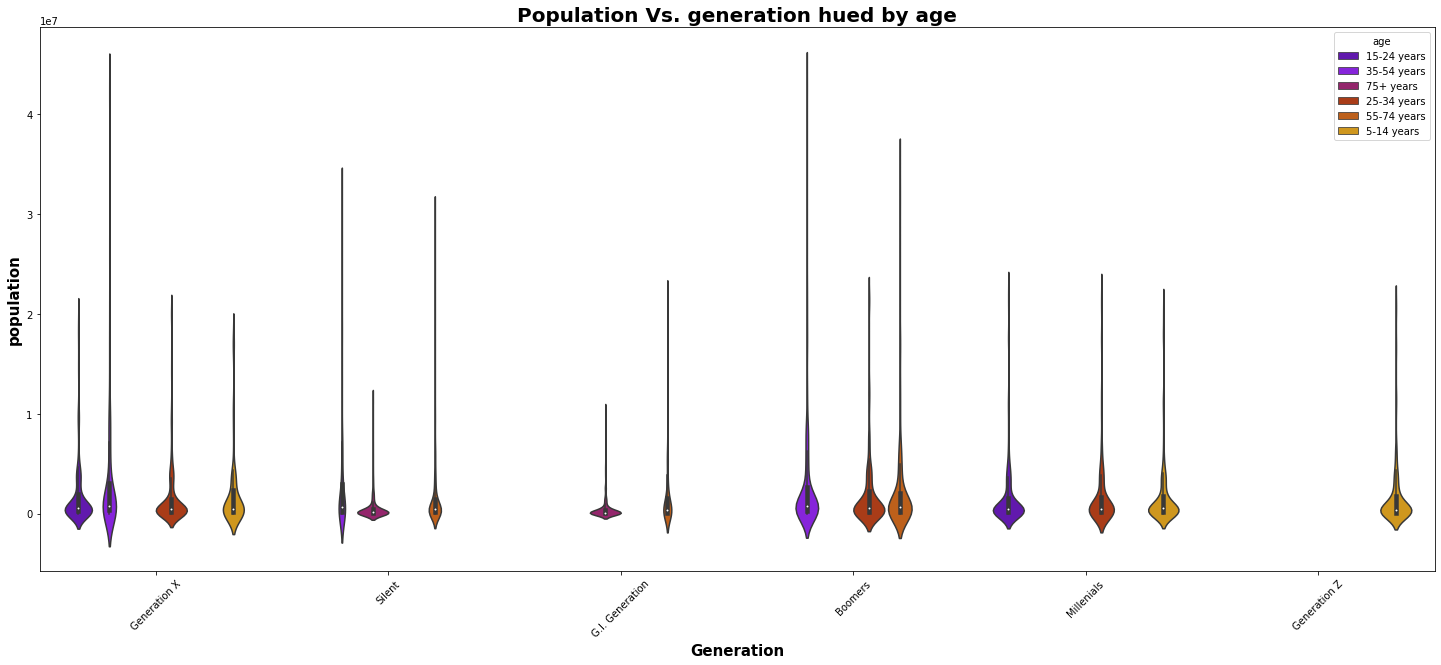

In [ ]:
plt.figure(figsize=(25,10))
sns.violinplot(x='generation',y='population',hue='age',data=df,palette='gnuplot')
plt.title('Population Vs. generation hued by age',fontweight='bold',fontsize=20)
plt.xlabel("Generation" ,fontweight='bold',fontsize=15)
plt.ylabel("population",fontweight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

#Inference:
1.	The outlier for age 35-54 for generation X indicates that there are values outside the percentile range.
2.	Since G.I generation includes years from 1901-1927, only people whose age is from 55+ violin plot is visible because the dataset is from 1986.
3.	The Generation Z includes years from late 1990’s to early 2010’s. This is apparent because only violin plot where people aged 5-14 years is visible.


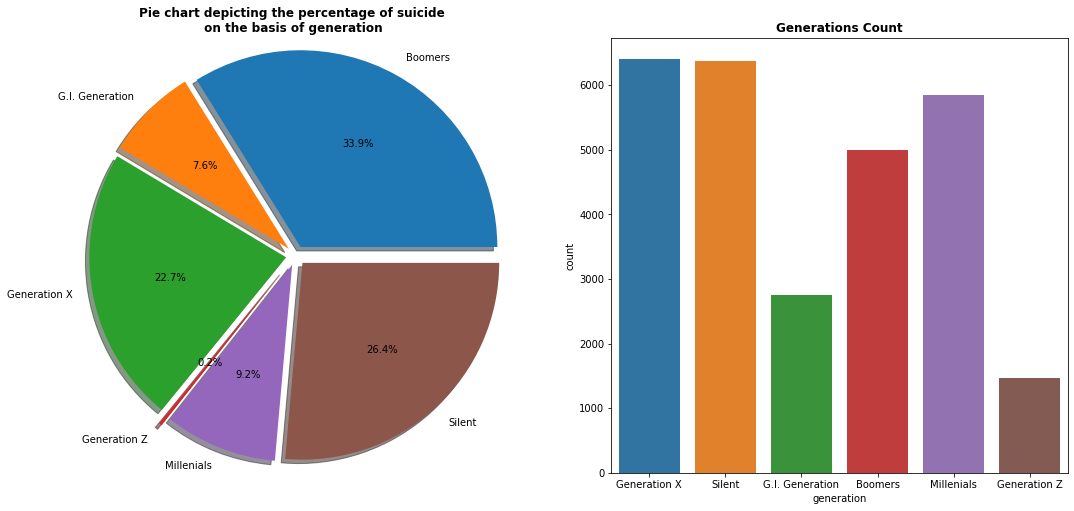

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
gen_sui = df.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

explode = (0.05,0.05,0.05,0.1,0.05,0.05)
ax[0].pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax[0].axis('equal')  
ax[0].set_title('Pie chart depicting the percentage of suicide\n on the basis of generation',fontweight='bold',fontsize=12)


sns.countplot('generation',data=df,ax=ax[1])
ax[1].set_title('Generations Count',fontweight='bold',fontsize=12)
plt.show()

#Inference:
1.	From the pie chart, it is understood that bloomers have the highest suicide rate.
2.	Silent generation has suicide count above 6000.
3.	Generation X has a suicide rate of 22.7%.
4.	From the year 1986-2016, 5000 boomers committed suicide.
5.	Generation Z has the lowest suicide rate of 0.2%.


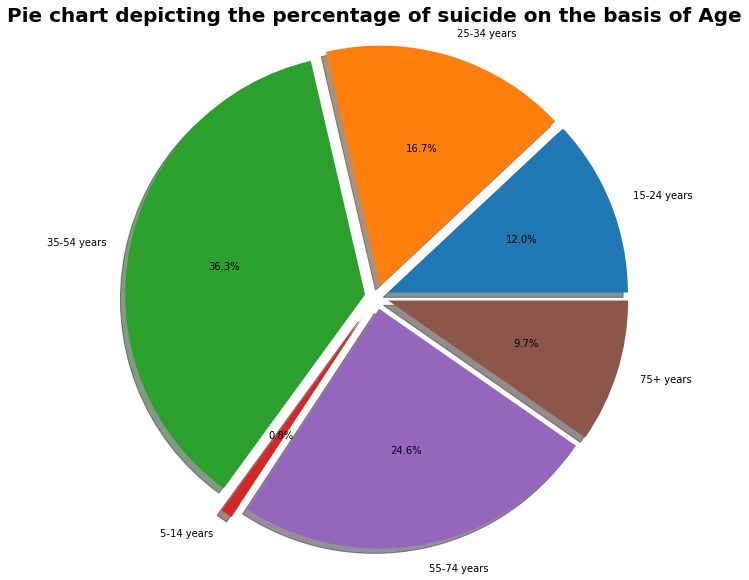

In [ ]:
gen_sui = df.pivot_table('suicides_no', index='age', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 10))
explode = (0.05,0.05,0.05,0.1,0.05,0.05)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')  
plt.title('Pie chart depicting the percentage of suicide on the basis of Age',fontweight='bold',fontsize=20)

plt.show()

#Inference:
1. People aged 5-14 years have the lowest suicide rate of 0.8%.
2. Aged 35-54 years, have the highest suicide rate of 36.3%.
3. 75+ aged people have a suicide rate of 9.7%.

#World Map indicating the total suicide in clusters. 

In [ ]:
import folium
from folium.plugins import MarkerCluster

gps = pd.read_csv("/content/drive/My Drive/dataset/concap.csv")

count = 0
for i in sorted(df.country.unique()):
    if len(gps.CountryName[gps.CountryName == i].values) == 0:
        print('MISSING in gps:  df: {}\t\tgps:{}'.format(i,gps.CountryName[gps.CountryName == i].values))
        count = count + 1
print('check complete:  {} missing'.format(count)) 

#  update names in df to match the gps file
df1=df.replace({'Cabo Verde':'Cape Verde','Republic of Korea':'South Korea','Russian Federation':'Russia','Saint Vincent and Grenadines':'Saint Vincent and the Grenadines'},inplace=True)

df1 = df.join(gps.set_index('CountryName'), on='country')
df1 = df1.drop(['HDI for year','country-year','CountryCode','CapitalName'], axis=1)



MISSING in gps:  df: Cabo Verde		gps:[]
MISSING in gps:  df: Republic of Korea		gps:[]
MISSING in gps:  df: Russian Federation		gps:[]
MISSING in gps:  df: Saint Vincent and Grenadines		gps:[]
check complete:  4 missing


In [ ]:
top10 = ['China','India','United States','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia','Mexico']
in_set = df1.country[df1.country.str.contains('|'.join(top10))].unique().tolist()

print('Out of the top 10 most populous countries: \n{}\n\nonly the following {} are present:\n{}'.format(top10,len(in_set),in_set))

#  dataset
print('\n\nDataset has', len(df1['country'].unique()),'countries (out of 195) on' ,len(df1['ContinentName'].unique()),'continents spanning' ,len(df1['year'].unique()),'years.')

Out of the top 10 most populous countries: 
['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']

only the following 4 are present:
['Brazil', 'Mexico', 'Russia', 'United States']


Dataset has 101 countries (out of 195) on 7 continents spanning 32 years.


#Dataset has 101 countries (out of 195) on 7 continents spanning 32 years.

In [ ]:
mapdf = pd.DataFrame(columns =  ['country','suicides_no','lat','lon'])

mapdf.lat = mapdf.lat.astype(float).fillna(0.0)
mapdf.lon = mapdf.lat.astype(float).fillna(0.0)

mapdf['country']     = df1['suicides_no'].groupby(df1['country']).sum().index
mapdf['suicides_no'] = df['suicides_no'].groupby(df['country']).sum().values
for i in range(len(mapdf.country)):
    mapdf.lat[i] =  df1.CapitalLatitude[(df1['country'] == mapdf.country[i])].unique()
    mapdf.lon[i] = df1.CapitalLongitude[(df1['country'] == mapdf.country[i])].unique()


#  make map - popup displays country and suicide count
#  lat/lon must be "float"
world_map = folium.Map(location=[mapdf.lat.mean(),mapdf.lon.mean()],zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(mapdf)-1):
    label = '{}:  {} suicides'.format(mapdf.country[i].upper(),mapdf.suicides_no[i])
    label = folium.Popup(label, parse_html=True)
    folium.Marker(location=[mapdf.lat[i],mapdf.lon[i]],
            popup = label,
            icon = folium.Icon(color='green')
    ).add_to(marker_cluster)


world_map.add_child(marker_cluster)
world_map   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
